<a href="https://colab.research.google.com/github/peytonrunyan/DS-Sprint-01-Dealing-With-Data/blob/master/Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# This is my homework

In [0]:
#https://data.cityofchicago.org/api/views/5yjb-v3mj/rows.csv?accessType=DOWNLOAD

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_csv('https://data.cityofchicago.org/api/views/5yjb-v3mj/rows.csv?accessType=DOWNLOAD')

In [3]:
df.head(5)

,CENSUS BLOCK,TOTAL POPULATION
0,310003002,104
1,310003003,46
2,310003004,40
3,310003005,58
4,310003006,75


In [6]:
list(df)

['CENSUS BLOCK', 'TOTAL POPULATION']

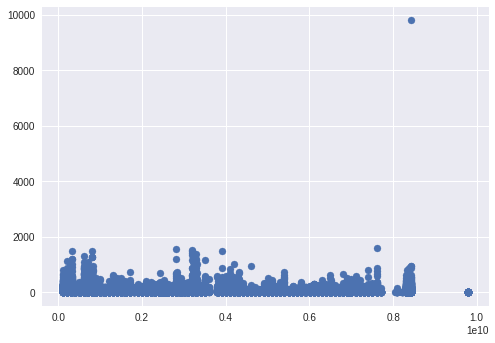

In [7]:
plt.scatter(df['CENSUS BLOCK'], df['TOTAL POPULATION'])

In [16]:
df.tail(5)

,CENSUS BLOCK,TOTAL POPULATION
46286,8419002052,0
46287,8419002053,32
46288,8419002054,131
46289,8419002055,79
46290,8419002056,20


In [32]:
len(df)

46291

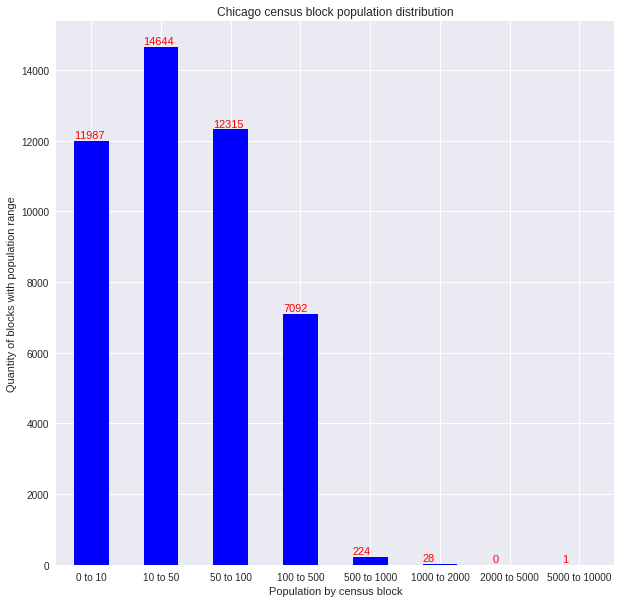

In [43]:
test = pd.cut(df['TOTAL POPULATION'], bins=[0, 10, 50, 100, 500, 1000, 2000, 5000, 10000], include_lowest=True);
ax = test.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,10))
ax.set_xticklabels(['0 to 10', '10 to 50', '50 to 100', '100 to 500', '500 to 1000', '1000 to 2000', '2000 to 5000', '5000 to 10000'])
ax.set_xlabel('Population by census block')
ax.set_ylabel('Quantity of blocks with population range')
ax.set_title('Chicago census block population distribution')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+80, \
            str(round((i.get_height()), 2)), fontsize=11, color='red')
plt.show()

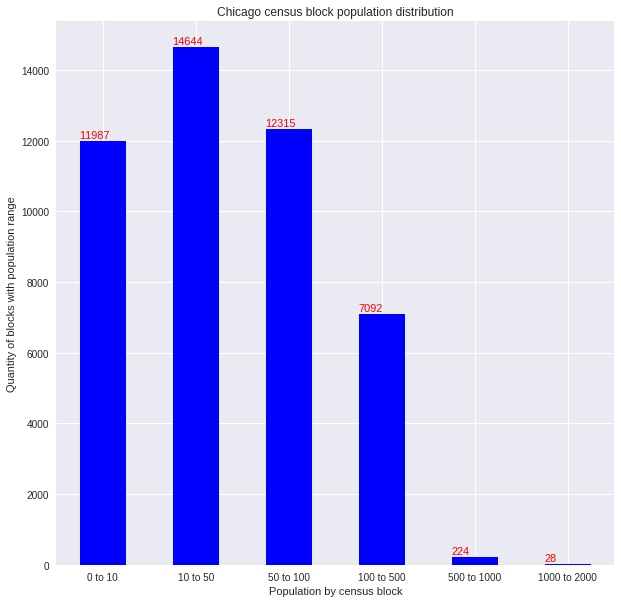

In [47]:
test = pd.cut(df['TOTAL POPULATION'], bins=[0, 10, 50, 100, 500, 1000, 2000], include_lowest=True);
ax = test.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,10))
ax.set_xticklabels(['0 to 10', '10 to 50', '50 to 100', '100 to 500', '500 to 1000', '1000 to 2000'])
ax.set_xlabel('Population by census block')
ax.set_ylabel('Quantity of blocks with population range')
ax.set_title('Chicago census block population distribution')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+90, \
            str(round((i.get_height()), 2)), fontsize=11, color='red')
plt.show()

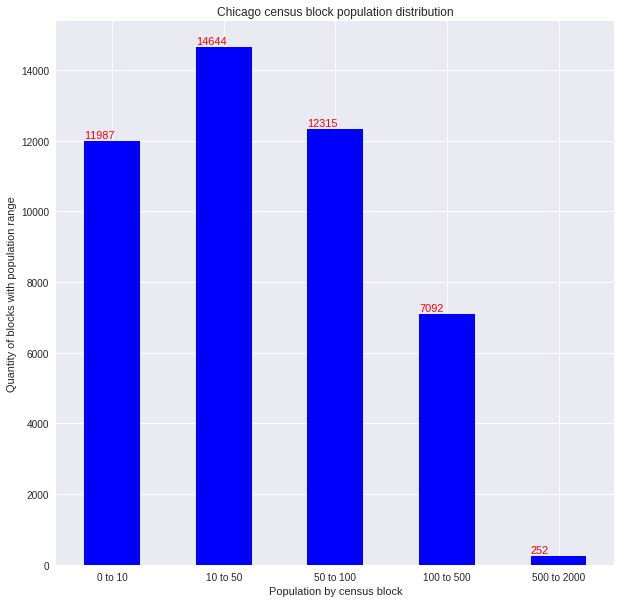

In [48]:
test = pd.cut(df['TOTAL POPULATION'], bins=[0, 10, 50, 100, 500, 2000], include_lowest=True);
ax = test.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,10))
ax.set_xticklabels(['0 to 10', '10 to 50', '50 to 100', '100 to 500', '500 to 2000'])
ax.set_xlabel('Population by census block')
ax.set_ylabel('Quantity of blocks with population range')
ax.set_title('Chicago census block population distribution')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+90, \
            str(round((i.get_height()), 2)), fontsize=11, color='red')
plt.show()

In [0]:
df1= pd.read_csv('https://chronicdata.cdc.gov/views/6vp6-wxuq/rows.csv?accessType=DOWNLOAD')

In [50]:
df1.head(5)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2015,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,15.7,NaN,NaN,308745538.0,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
1,2015,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,15.0,NaN,NaN,308745538.0,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
2,2015,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,...,22.7,NaN,NaN,308745538.0,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis
3,2015,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,...,24.9,NaN,NaN,308745538.0,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis
4,2015,US,United States,NaN,US,BRFSS,Unhealthy Behaviors,59,Binge drinking among adults aged >=18 Years,%,...,17.4,NaN,NaN,308745538.0,NaN,UNHBEH,BINGE,NaN,NaN,Binge Drinking


In [52]:
df1.describe()

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CityFIPS,TractFIPS
count,810103.000000,789432.000000,789432.000000,789432.000000,8.099350e+05,8.100470e+05,7.820470e+05
mean,2014.716066,30.835291,29.096031,32.575900,3.203030e+04,2.606307e+06,2.592907e+10
std,0.450906,25.210650,24.671872,25.697762,2.568755e+06,1.686183e+06,1.675378e+10
min,2014.000000,0.200000,0.100000,0.300000,1.000000e+00,1.500300e+04,1.073000e+09
25%,2014.000000,9.700000,8.600000,10.900000,2.405000e+03,6.813440e+05,8.001009e+09
50%,2015.000000,23.000000,20.700000,25.300000,3.632000e+03,2.622000e+06,2.608100e+10
75%,2015.000000,45.600000,43.000000,48.500000,5.041000e+03,4.055000e+06,4.010911e+10
max,2015.000000,95.500000,94.100000,96.500000,3.087455e+08,5.613900e+06,5.602100e+10


In [54]:
len(df1)

810103

In [55]:
list(df1)

['Year',
 'StateAbbr',
 'StateDesc',
 'CityName',
 'GeographicLevel',
 'DataSource',
 'Category',
 'UniqueID',
 'Measure',
 'Data_Value_Unit',
 'DataValueTypeID',
 'Data_Value_Type',
 'Data_Value',
 'Low_Confidence_Limit',
 'High_Confidence_Limit',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'PopulationCount',
 'GeoLocation',
 'CategoryID',
 'MeasureId',
 'CityFIPS',
 'TractFIPS',
 'Short_Question_Text']

In [0]:
#can't really graph this stuff. On to the next one!

In [0]:
#https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/34842307-0da6-458a-9df3-a09ab3e3a489/download/aggregate-household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars.csv
df1= pd.read_csv('https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/34842307-0da6-458a-9df3-a09ab3e3a489/download/aggregate-household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars.csv')

In [58]:
df1.head(5)

,Neighborhood,Id,Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars),Margin of Error; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)
0,Allegheny Center,1,39947000,6437773
1,Allegheny West,2,23793300,22025939
2,Allentown,3,38303700,7490207.043
3,Arlington,4,35349900,6140662.723
4,Arlington Heights,5,2389600,1162393


In [59]:
list(df1)

['Neighborhood',
 'Id',
 'Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)',
 'Margin of Error; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)']

In [60]:
len(df1)

91

In [0]:
#more meh data

In [62]:
df = pd.read_csv('https://data.baltimorecity.gov/api/views/782b-zpd7/rows.csv?accessType=DOWNLOAD')
df.head(5)

,blockGroup,marketCategory,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
0,101001,Regional Choice,79,0.40,15.25,15225.0,0,0,0,3,238000.0,78.0
1,101002,Regional Choice,69,0.35,3.59,11975.0,1,1,1,5,235000.0,69.4
2,101003,Regional Choice,47,0.41,5.08,6100.0,0,3,0,3,299000.0,78.6
3,102001,Middle Market Choice,51,0.49,0.00,12300.0,1,0,2,8,159900.0,68.8
4,102002,Regional Choice,32,0.46,0.00,14100.0,0,0,2,5,199694.0,77.2


In [63]:
len(df)

710

In [64]:
list(df)

['blockGroup',
 'marketCategory',
 'sales20092010',
 'salesPriceCoefficientVariance ',
 'commercialResidentialLandRatio',
 'unitsPerSquareMile',
 'residentialPermits',
 'vacantLots',
 'vacantHouseNotices',
 'foreclosureFilings',
 'medianSalesPrice20092010',
 'ownerOccupied']

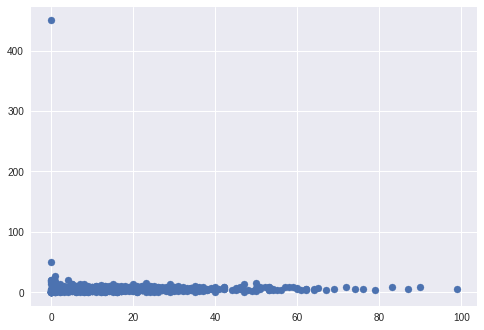

In [65]:
plt.scatter(df['sales20092010'],df['foreclosureFilings'])
plt.show()

In [66]:
df['foreclosureFilings'].describe()

count    710.000000
mean       5.867606
std       17.069573
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max      450.000000
Name: foreclosureFilings, dtype: float64

In [0]:
test=df['foreclosureFilings'].sort_values(ascending=False)

In [81]:
print(test)

497    450
336     50
30      26
26      21
457     20
180     20
175     18
22      18
438     17
40      15
349     15
179     15
147     14
300     14
498     14
43      13
254     13
182     13
185     13
269     13
36      13
482     13
257     13
256     12
472     12
181     12
259     11
272     11
278     11
136     11
      ... 
669      0
197      0
667      0
674      0
199      0
329      0
27       0
28       0
143      0
144      0
145      0
146      0
101      0
429      0
458      0
491      0
492      0
493      0
499      0
502      0
159      0
566      0
567      0
58       0
57       0
46       0
613      0
172      0
29       0
709      0
Name: foreclosureFilings, Length: 710, dtype: int64


In [0]:
clean_df = df.drop([497,336])

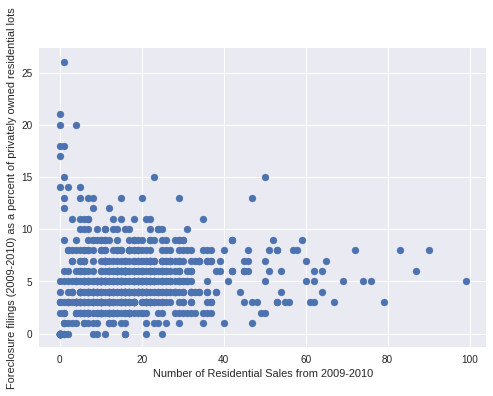

In [88]:
fig, ax = plt.subplots()
plt.scatter(clean_df['sales20092010'],clean_df['foreclosureFilings'])
ax.set_xlabel('Number of Residential Sales from 2009-2010')
ax.set_ylabel('Foreclosure filings (2009-2010) as a percent of privately owned residential lots')
plt.show()

Text(0.5,1,'Residential Sales vs. Foreclosure Filings in Baltimore by Neighborhood (2009-2010)')

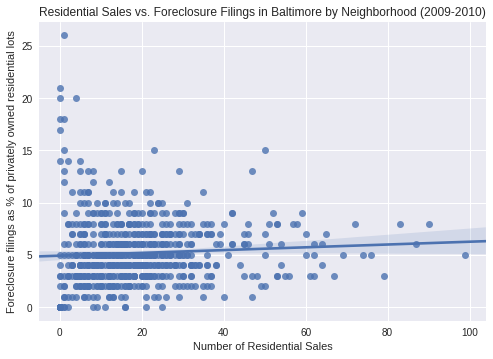

In [100]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x='sales20092010', y='foreclosureFilings', data=clean_df)
plt.xlabel("Number of Residential Sales")
plt.ylabel("Foreclosure filings as % of privately owned residential lots")
plt.title("Residential Sales vs. Foreclosure Filings in Baltimore by Neighborhood (2009-2010)")

In [0]:
# ['blockGroup',
#  'marketCategory',
#  'sales20092010',
#  'salesPriceCoefficientVariance ',
#  'commercialResidentialLandRatio',
#  'unitsPerSquareMile',
#  'residentialPermits',
#  'vacantLots',
#  'vacantHouseNotices',
#  'foreclosureFilings',
#  'medianSalesPrice20092010',
#  'ownerOccupied']

Text(0.5,1,'Median Sales Price vs. Foreclosure Filings in Baltimore by Neighborhood (2009-2010)')

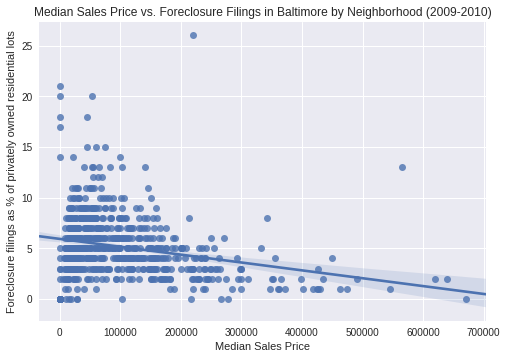

In [102]:
ax = sns.regplot(x='medianSalesPrice20092010', y='foreclosureFilings', data=clean_df)
plt.xlabel("Median Sales Price")
plt.ylabel("Foreclosure filings as % of privately owned residential lots")
plt.title("Median Sales Price vs. Foreclosure Filings in Baltimore by Neighborhood (2009-2010)")

Text(0.5,1,'Vacant Lots vs. Foreclosure Filings in Baltimore by Neighborhood (2009-2010)')

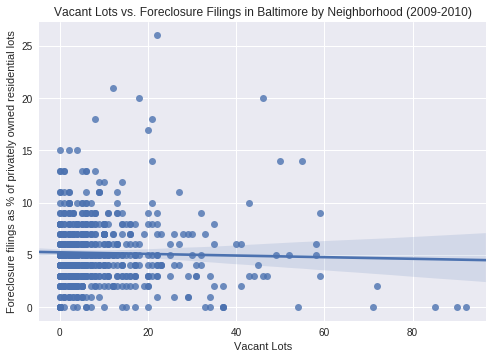

In [104]:
ax = sns.regplot(x='vacantLots', y='foreclosureFilings', data=clean_df)
plt.xlabel("Vacant Lots")
plt.ylabel("Foreclosure filings as % of privately owned residential lots")
plt.title("Vacant Lots vs. Foreclosure Filings in Baltimore by Neighborhood (2009-2010)")